Тестовое MedStat Solutions
1.	Загрузить и описать полученный набор данных;
2.	Провести предобработку данных;
3.	Провести графический и статистический анализ;
4.	Выдвинуть несколько гипотез и провести соответствующие статистические тесты;
5.	Построить модель бинарной классификации;
6.	Вывести важность признаков в графическом представлении.


# Импорт библотек

In [112]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mlxtend.plotting import heatmap, scatterplotmatrix
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# 1 Загрузка и обзор данных

In [ ]:
data = pd.read_csv('test_data.csv')

In [73]:
pd.options.display.max_columns = 0
RANDOM_STATE = 42

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# 2 Графический анализ

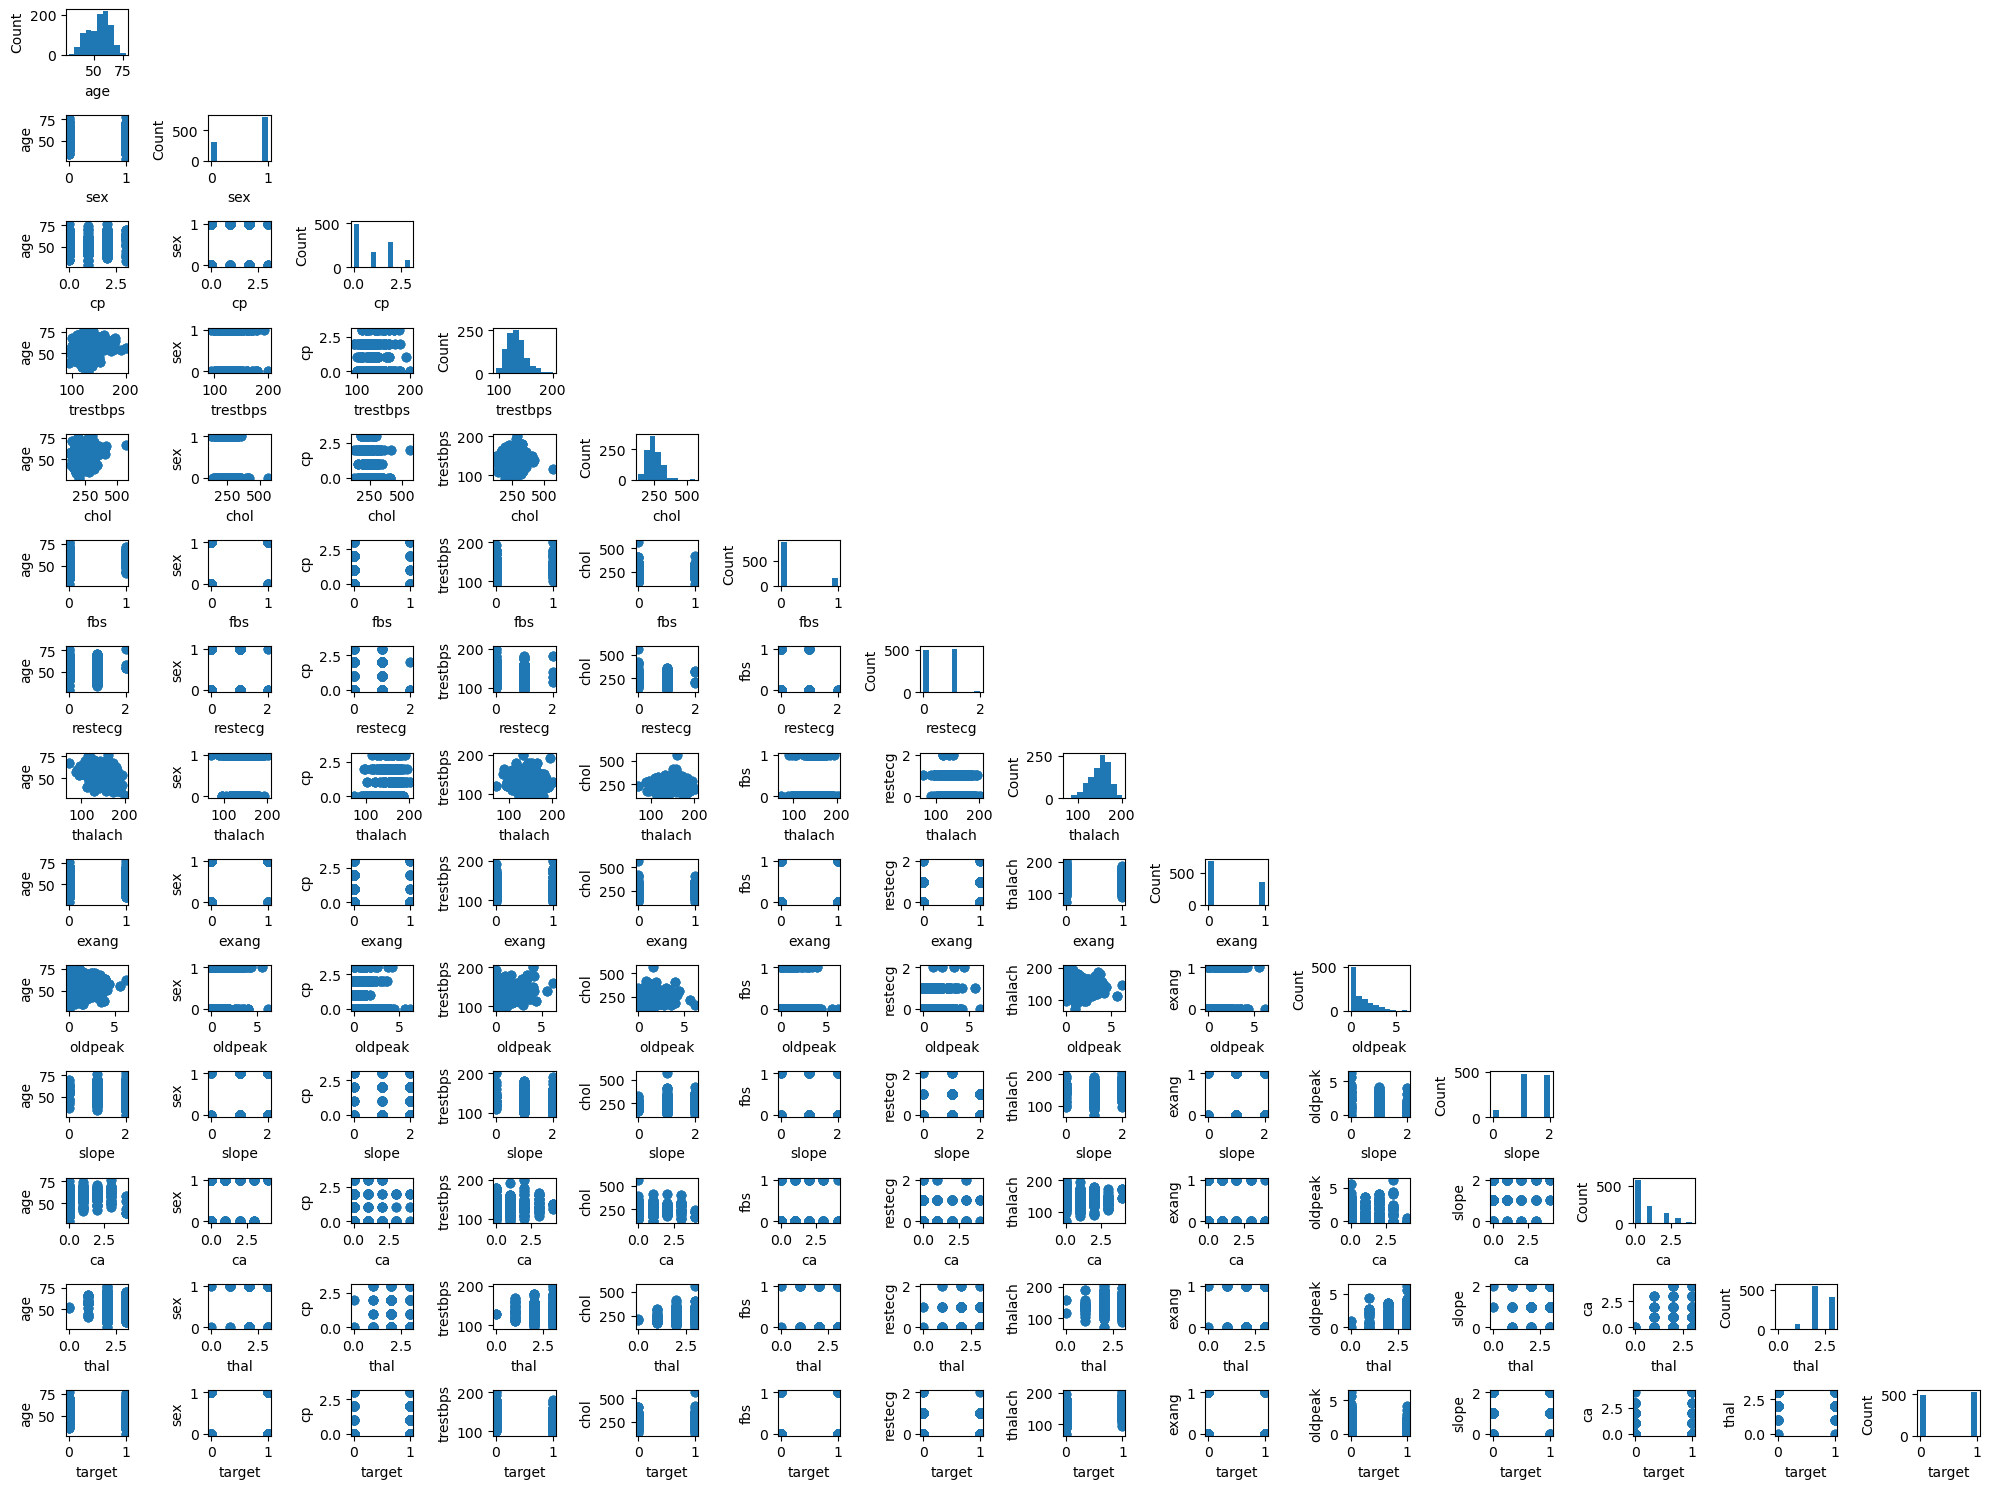

In [30]:
# матрица диаграмм рассеяния
scatterplotmatrix(data.values, figsize=(20, 15),
                names=data.columns)
plt.tight_layout()
plt.show()

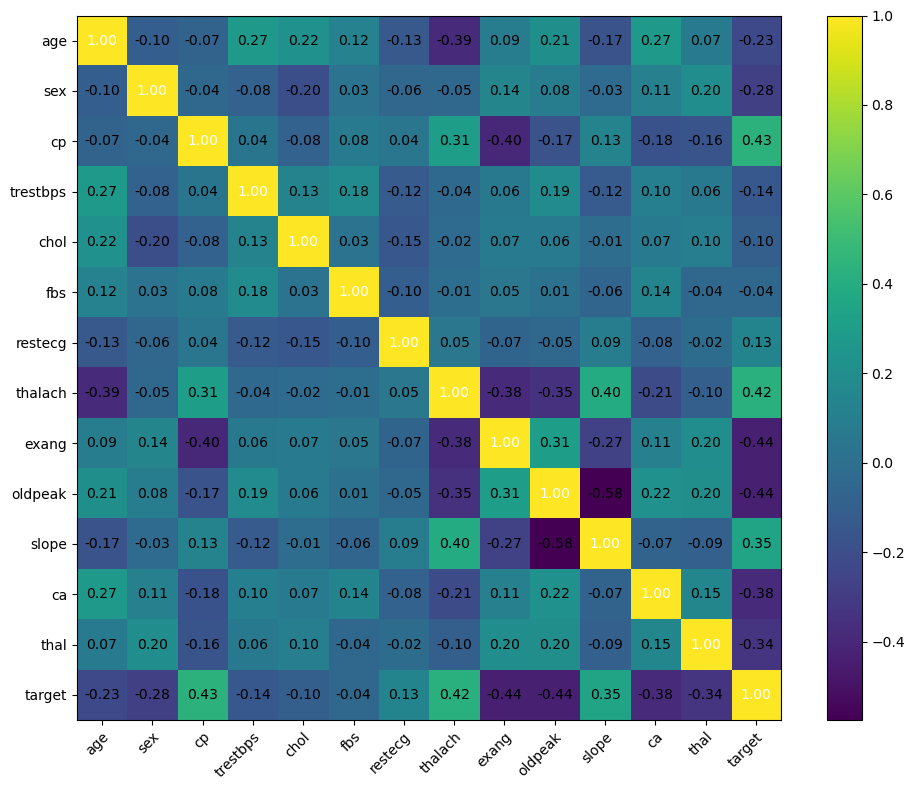

In [34]:
# матрица корреляции
cm = np.corrcoef(data.values.T)
hm = heatmap(cm, row_names=data.columns, column_names=data.columns, figsize=(10, 8))
plt.tight_layout()
plt.show()

In [38]:
# количество таргетов в данных
data.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [43]:
# процент таргета "0" в данных 
data.target.value_counts()[0]/len(data)

0.4868292682926829

<Axes: xlabel='sex', ylabel='count'>

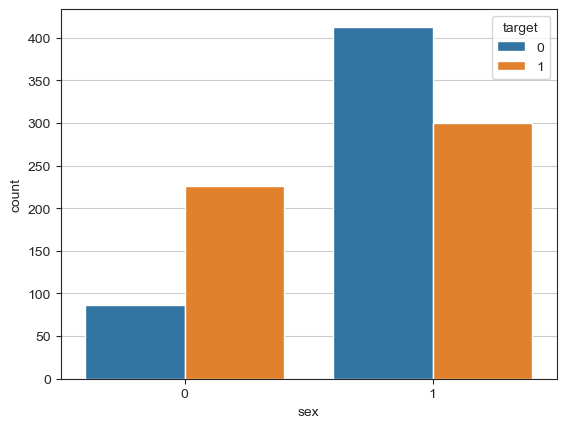

In [57]:
# количество данных с признаком "sex" и разделением по таргетам в данных
sns.set_style("ticks", {'axes.grid' : True})
sns.countplot(data, x='sex', hue='target')

In [71]:
sex_0 = data[data['sex']==0].target.value_counts()
sex_1 = data[data['sex']==1].target.value_counts()
print('процент таргета 0 среди данных с признаком sex=0', sex_0[0]/len(data[data['sex']==0]))
print('процент таргета 0 среди данных с признаком sex=1', sex_1[0]/len(data[data['sex']==1]))

процент таргета 0 среди данных с признаком sex=0 0.27564102564102566
процент таргета 0 среди данных с признаком sex=1 0.5792426367461431


## Выводы:
- наибольшая положительная корреляция с таргетом имеется у признаков "cp", "thalach", "slope", отрицательная - у признаков "exang", "oldpeak", "ca";
- таргет в представленных данных представлен в пропорции 48.7 к 51.3;
- таргет в представленных данных представлен в пропорции 27.6 к 72.4 среди данных с признаком sex=0 и в пропорции 58 к 42 среди данных с признаком sex=1

# 3 Предобработка данных

In [10]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
y = data['target']

In [15]:
# обработка признаков:
# категориальные признаки разделяются OneHotEncoder, числовые - стандартизируются
category_columns = data[['sex', 'cp', 'fbs', 'restecg', 'exang',
                        'slope', 'ca', 'thal']]
numeric_columns = data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
preprocessor = ColumnTransformer(
    [
        ('binary', OneHotEncoder(), category_columns.columns.tolist()),
        ('numeric', StandardScaler(), numeric_columns.columns.tolist())
    ],
    sparse_threshold=0,
    remainder='drop',
    verbose_feature_names_out=False
)

In [16]:
data_transformed = preprocessor.fit_transform(data)
data_transformed = pd.DataFrame(
    data_transformed,
    columns=preprocessor.get_feature_names_out()
    )

In [19]:
data_transformed

,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,age,trestbps,chol,thalach,oldpeak
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.158157,0.479107,-0.833861,0.255968,1.727137
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.716595,0.764688,-1.396233,-1.048692,1.301417
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.724079,0.936037,-0.833861,0.516900,-0.912329
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.834359,0.364875,0.930822,-1.874977,0.705408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.503520,0.479107,-0.484803,0.647366,-0.912329
1021,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.613800,-0.377636,0.232705,-0.352873,1.471705
1022,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.819834,-1.234378,0.562371,-1.353113,-0.060888
1023,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.488996,-1.234378,0.155137,0.429923,-0.912329


In [72]:
# разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    data_transformed,
    y,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y
)

# 4 Построение baseline-модели

## 4.1 Логистическая регрессия

In [109]:
weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', 
                            random_state=RANDOM_STATE)
    lr.fit(X_train, y_train)
    weights.append(lr.coef_)
    params.append(10**c)

weights = np.array(weights)

## 4.2 Случайный лес

In [146]:
# разделение данных для модели случайного леса (не требуется предварительная обработка) на тренировочную и тестовую выборки
X_train_forest, X_test_forest, y_train_forest, y_test_forest = train_test_split(
    data.drop('target', axis=1),
    y,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y
)

In [147]:
forest = RandomForestClassifier(n_estimators=500,
                                random_state=RANDOM_STATE)

forest.fit(X_train_forest, y_train_forest)

RandomForestClassifier(n_estimators=500, random_state=42)

# 5 Важность признаков

## 5.1 Логистическая регрессия

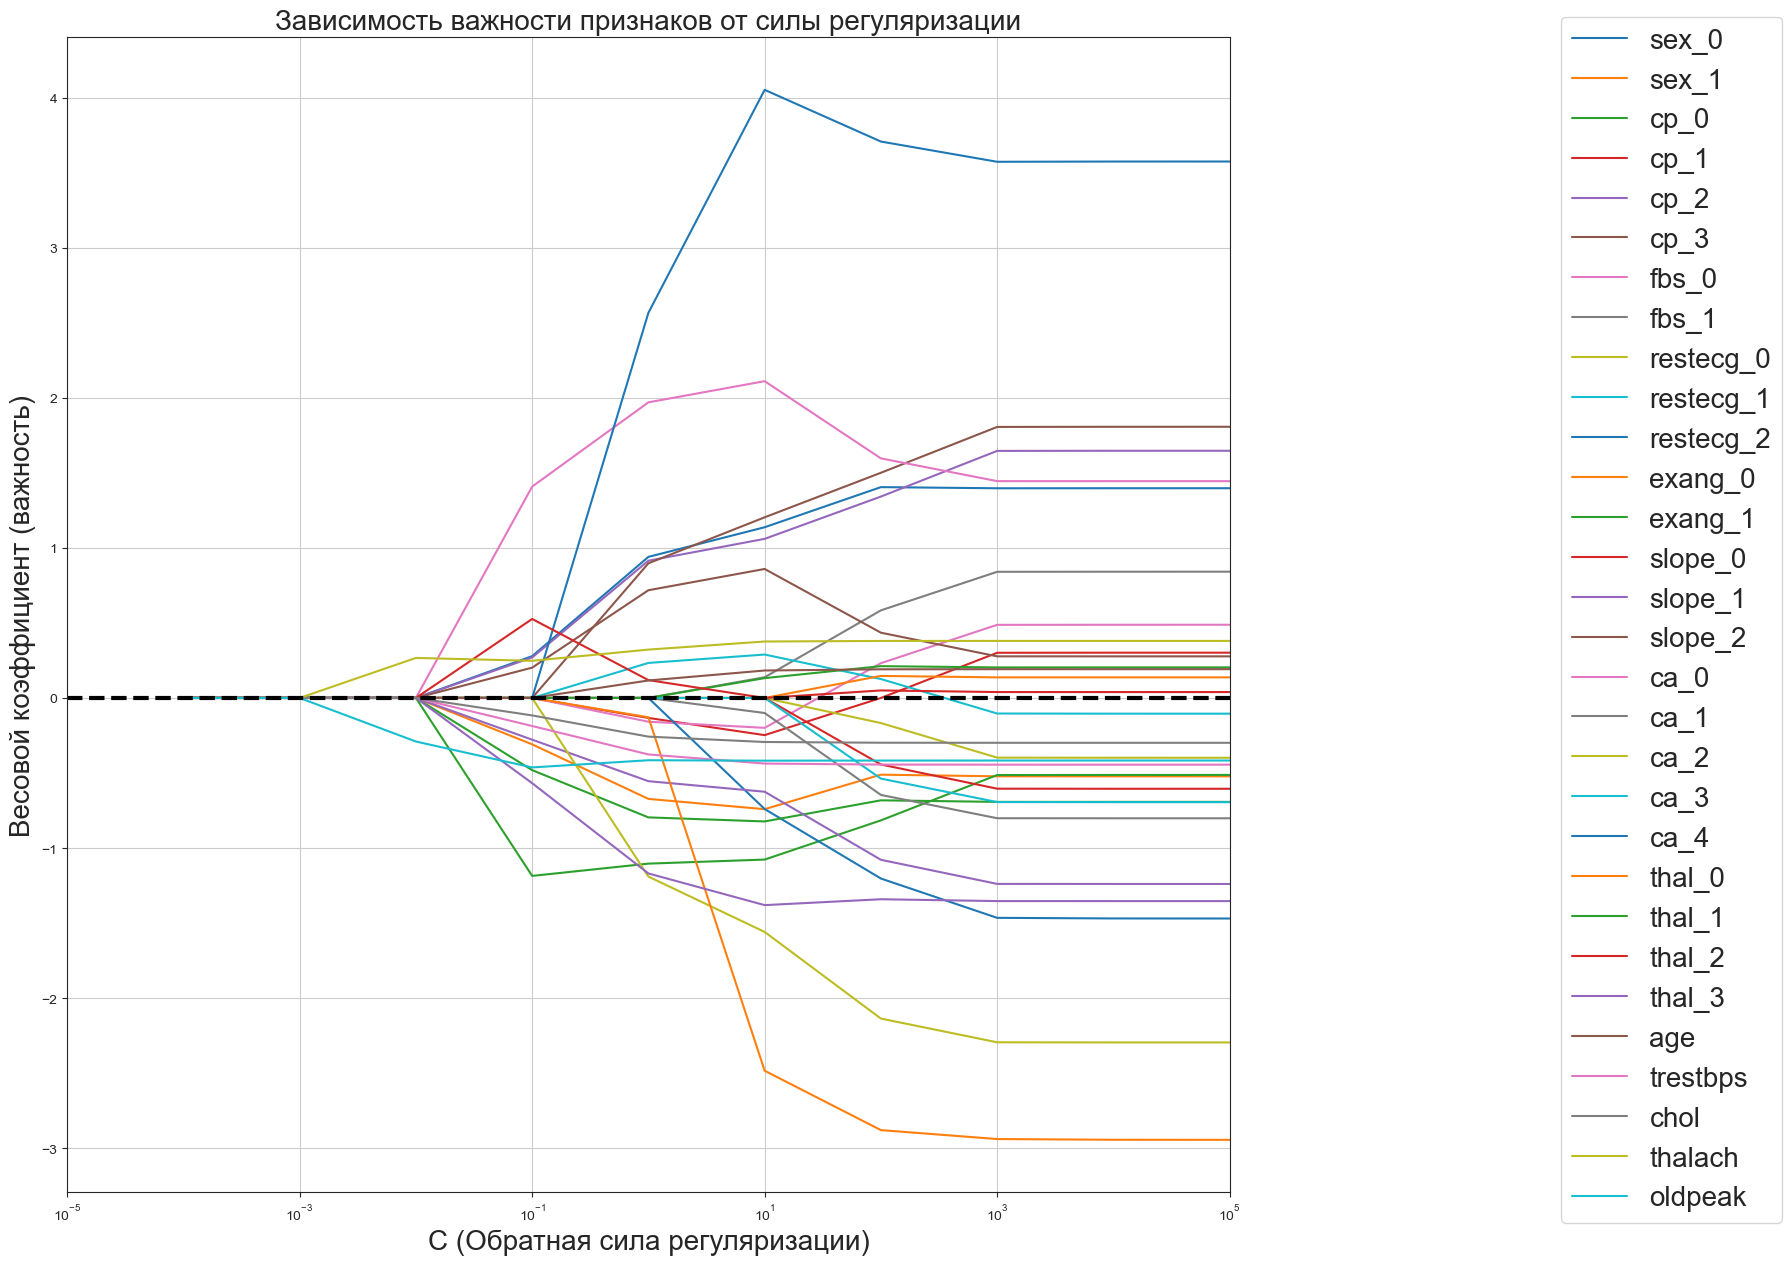

In [171]:
fig = plt.figure(figsize=(15,15))
ax = plt.subplot(111)

for column in range(weights.shape[1]):
    plt.plot(params, weights[:, column],
             label=lr.feature_names_in_)
plt.title('Зависимость важности признаков от силы регуляризации', fontsize=20)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Весовой коэффициент (важность)', fontsize=20)
plt.xlabel('C (Обратная сила регуляризации)', fontsize=20)
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True, fontsize=20)

### На приведённом графике показано, что наиболее важными являются признаки "thalach" и "oldpeak" (данные признаки остались единственными значими для модели логистической регрессии при параметре регуляризации С<0.01)

## 5.2 Случайный лес

 1) cp                             0.151167
 2) thalach                        0.115185
 3) ca                             0.111957
 4) oldpeak                        0.103748
 5) thal                           0.095052
 6) age                            0.093055
 7) chol                           0.078121
 8) exang                          0.073002
 9) trestbps                       0.071053
10) slope                          0.046519
11) sex                            0.031476
12) restecg                        0.019704
13) fbs                            0.009961


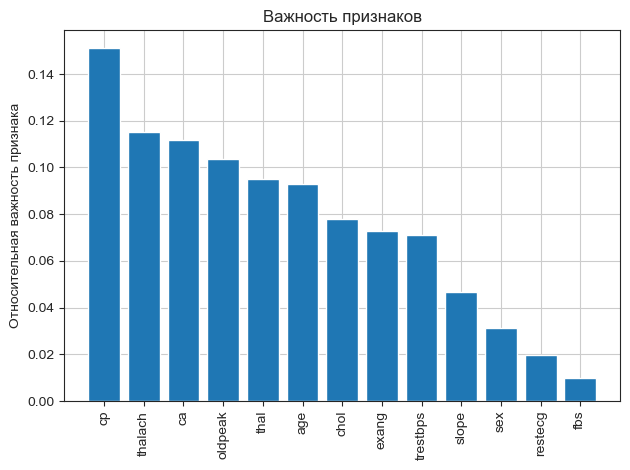

In [169]:
feat_labels = X_train_forest.columns
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train_forest.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Важность признаков')
plt.bar(range(X_train_forest.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train_forest.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train_forest.shape[1]])
plt.ylabel('Относительная важность признака')
plt.tight_layout()
plt.show()

### Модель случайного леса показывает, что наиболее важным признаком является "cp", за ним следуют "thalach" и "ca". Признак "thalach", выделенный моделью логистической регрессии, является четвёртым по значимости.

# 6 Выводы:
- Признаки, выделенные в результате первичного анализа данных по коэффициенту корреляции, в основном оказались наиболее важными после построения двух моделей: логистической регрессии и случайного леса.
- Модель логистической регрессии показала наиболее важными признаки "thalach" и "oldpeak".
- Модель случайного леса выделяет признаки "cp", "thalach" и "ca".
Для более углубленного анализа данных и построения лучших моделей необходимо учитывать показатели качества моделей (accuracy, recall или другие). 